# Executive Summary

A Linear Regression model was developed using Machine Learning to evaluate the relation between the number of rooms in a home and the price of the home. This model was created using Python (Pandas, Scikit-Learn and Seaborn) to structure, analyze and visualize the data set.

## Model Performance

The MSE value for the training and test set were calculated to be 43.31 and 44.84 respectively. A residual plot (last cell) comparing the training and test residuals has shown that indeed the model is appropriate for the analyzed data.

In [1]:
#Imports for Data and Plots
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#Loading data set
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
#Description of data set
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,u'Number of Houses')

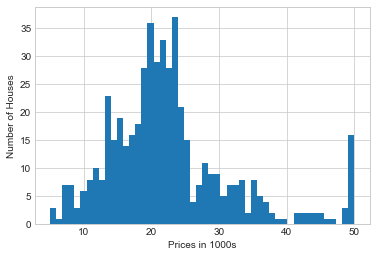

In [6]:
#Visualizing data set (Number of Rooms and Prices)
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in 1000s')
plt.ylabel('Number of Houses')

Text(0.5,0,u'Number of Rooms')

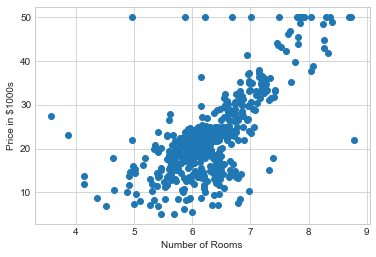

In [7]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [8]:
boston_df=DataFrame(boston.data)

boston_df.columns=boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price']=boston.target

In [10]:
#Structured Data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


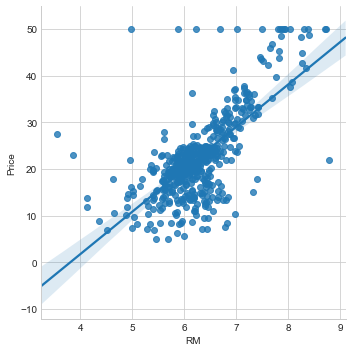

In [11]:
#Linear Regression plot (Number of Rooms and Price)
sns.lmplot('RM','Price',data=boston_df)

In [12]:
#Setting up data sets (Number of Rooms and Price)
x=boston_df.RM
x=np.vstack(boston_df.RM)
y=boston_df.Price

In [13]:
# create [x 1]
x=np.array([[value,1]for value in x])


In [14]:
m,b=np.linalg.lstsq(x,y)[0]

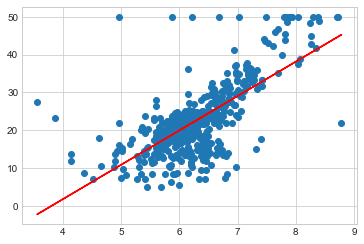

In [15]:
plt.plot(boston_df.RM,boston_df.Price,'o')

a=boston_df.RM

plt.plot(a,m*a+b,'r',label='Best Fit Line')

In [16]:
result=np.linalg.lstsq(x,y)

error_total=result[1]

rmse=np.sqrt(error_total/len(x))

print'Ther root mean square error was %.2f'%rmse

Ther root mean square error was 6.60


In [17]:
result

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [18]:
#Import of the linear regression function
import sklearn
from sklearn.linear_model import LinearRegression

In [19]:
lreg=LinearRegression()

In [20]:
import webbrowser
webbrowser.open('http://www.scikit-learn.org')

True

In [21]:
x_multi=boston_df.drop('Price',1)

y_target=boston_df.Price


In [22]:
lreg.fit(x_multi,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print'The estimated intercept coefficient is %.2f'%lreg.intercept_
print'the number of coefficients used was %d' %len(lreg.coef_)

The estimated intercept coefficient is 36.49
the number of coefficients used was 13


In [24]:
coeff_df=DataFrame(boston_df.columns)
coeff_df.columns=['Features']

coeff_df['Coefficient Estimate']=Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [25]:
#Splitting data into traning sets and test sets
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,boston_df.Price)

In [26]:
print x_train.shape,x_test.shape,y_train.shape,y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [27]:
#Developing the linear regression model using the training sets
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Validating the model 
pred_train=lreg.predict(x_train)
pred_test=lreg.predict(x_test)

In [29]:
print"Fit a model x_train, and calculate the MSE with y_train: %.2f"%np.mean((y_train-pred_train)**2)
print"Fit a model x_train, and calculate the MSE with x_test and y_test: %.2f"%np.mean((y_test-pred_test)**2)


Fit a model x_train, and calculate the MSE with y_train: 43.31
Fit a model x_train, and calculate the MSE with x_test and y_test: 44.84


Text(0.5,1,u'Residual Plots')

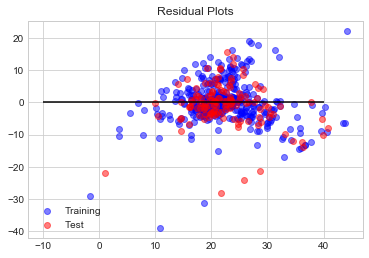

In [30]:
#Visual comparison between training and test residuals
train=plt.scatter(pred_train,(pred_train-y_train),c='b',alpha=0.5)

test=plt.scatter(pred_test,(pred_test-y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')